<a href="https://colab.research.google.com/github/sirsjosh/Computer-Vision/blob/main/Finding%20Contours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Finding Contours**
**Import resources and display image**

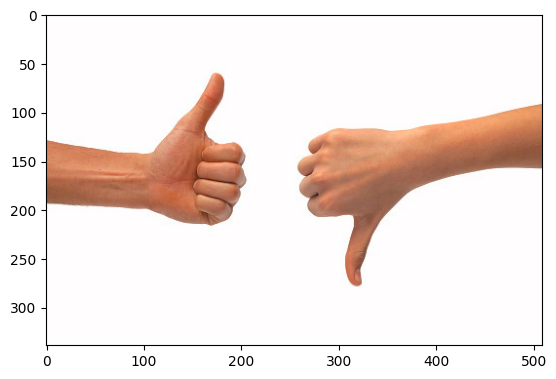

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import urllib

%matplotlib inline

# Read in the image
url = 'https://github.com/udacity/cd0360-Introduction-to-Computer-Vision/blob/main/1_3_Types_of_Features_Image_Segmentation/images/thumbs_up_down.jpg?raw=true'
req = urllib.request.urlopen(url)
arr = np.asarray(bytearray(req.read()),dtype = np.uint8)
image = cv2.imdecode(arr, -1)

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

**Produce a binary image for finding contours**

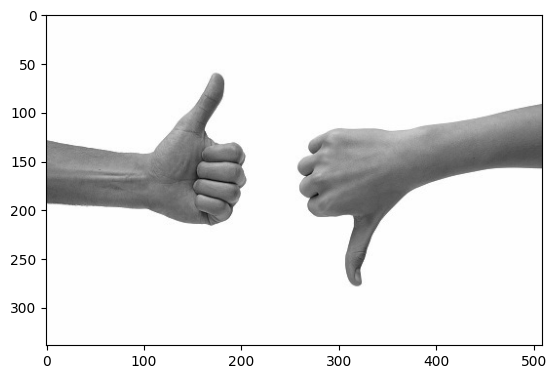

In [3]:
# Convert to grayscale
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

# Create a binary thresholded image
retval, binary = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)

plt.imshow(gray, cmap='gray')

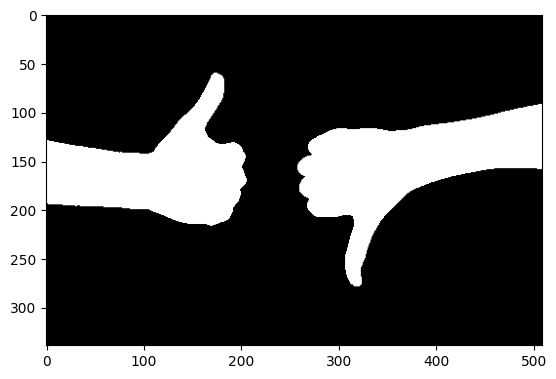

In [6]:
# Convert to grayscale
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

# Create a binary thresholded image
retval, binary = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)

plt.imshow(binary, cmap='gray')

**Find and draw the contours**

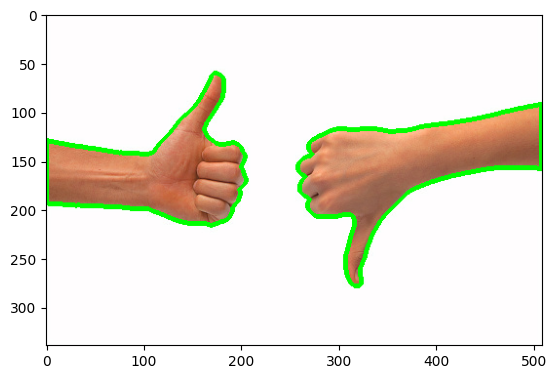

In [7]:
# Find contours from thresholded, binary image
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw all contours on a copy of the original image
contours_image = np.copy(image)
contours_image = cv2.drawContours(contours_image, contours, -1, (0,255,0), 3)

plt.imshow(contours_image)

# **Contour Features**
Every contour has a number of features that you can calculate, including the area of the contour, it's orientation (the direction that most of the contour is pointing in), it's perimeter, and many other properties outlined in OpenCV documentation, here.

In the next cell, you'll be asked to identify the orientations of both the left and right hand contours. The orientation should give you an idea of which hand has its thumb up and which one has its thumb down!

**Orientation**

The orientation of an object is the angle at which an object is directed. To find the angle of a contour, you should first find an ellipse that fits the contour and then extract the angle from that shape.

# Fit an ellipse to a contour and extract the angle from that ellipse
(x,y), (MA,ma), angle = cv2.fitEllipse(selected_contour)
Orientation values

These orientation values are in degrees measured from the x-axis. A value of zero means a flat line, and a value of 90 means that a contour is pointing straight up!

So, the orientation angles that you calculated for each contour should be able to tell us something about the general position of the hand. The hand with it's thumb up, should have a higher (closer to 90 degrees) orientation than the hand with it's thumb down.

**Find the orientation of each contour**

In [8]:
## it returns the orientations of a list of contours
## The list should be in the same order as the contours
## i.e. the first angle should be the orientation of the first contour
def orientations(contours):
    """
    Orientation
    :param contours: a list of contours
    :return: angles, the orientations of the contours
    """
    angles = []

    for contour in contours:
        # Fit an ellipse to the contour
        ellipse = cv2.fitEllipse(contour)
        # Extract the angle from the ellipse
        angle = ellipse[2]
        # Append the angle to the list of angles
        angles.append(angle)

    return angles

# Assuming 'contours' is a list of contours obtained earlier
angles = orientations(contours)
print('Angles of each contour (in degrees):', angles)

Angles of each contour (in degrees): [61.35833740234375, 82.27550506591797]


**Bounding Rectangle**

In the next cell, you'll be asked to find the bounding rectangle around the left hand contour, which has its thumb up, then use that bounding rectangle to crop the image and better focus on that one hand!

# Find the bounding rectangle of a selected contour
x,y,w,h = cv2.boundingRect(selected_contour)

# Draw the bounding rectangle as a purple box
box_image = cv2.rectangle(contours_image, (x,y), (x+w,y+h), (200,0,200),2)
And to crop the image, select the correct width and height of the image to include.

# Crop using the dimensions of the bounding rectangle (x, y, w, h)
cropped_image = image[y: y + h, x: x + w]
TODO: Crop the image around a contour

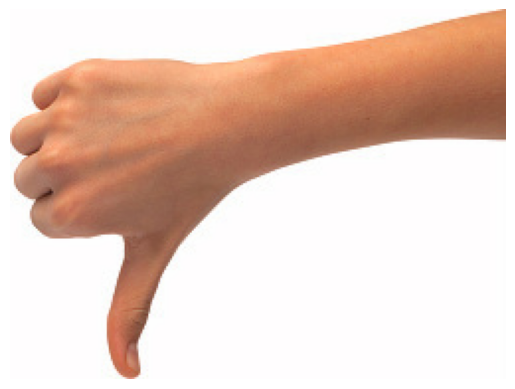

In [9]:
def left_hand_crop(image, selected_contour):
    """
    Left hand crop
    :param image: the original image
    :param selected_contour: the contour that will be used for cropping
    :return: cropped_image, the cropped image around the left hand
    """
    # Detect the bounding rectangle of the left hand contour
    x, y, w, h = cv2.boundingRect(selected_contour)

    # Crop the image using the dimensions of the bounding rectangle
    cropped_image = image[y: y + h, x: x + w]

    return cropped_image

# Assuming 'selected_contour' is the contour you want to use for cropping
# You should replace this value with the actual contour you selected
selected_contour = contours[0]  # For example, select the first contour from the list

# If a contour is selected
if selected_contour is not None:
    # Call the crop function with the selected contour and display the cropped image
    cropped_image = left_hand_crop(image, selected_contour)
    plt.imshow(cropped_image)
    plt.axis('off')
    plt.show()
else:
    print("No contour selected.")
